In [2]:
#ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
#データ読み込み
DF = pd.read_csv('data.csv')

# データの背後の特徴を把握する

## 意思決定写像[ 3-1 ~ 3-8 ]

1変数データの視覚的特徴把握

Text(0, 0.5, 'Freq')

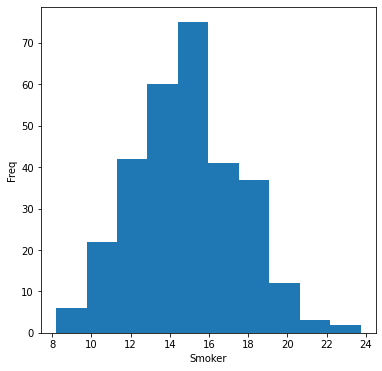

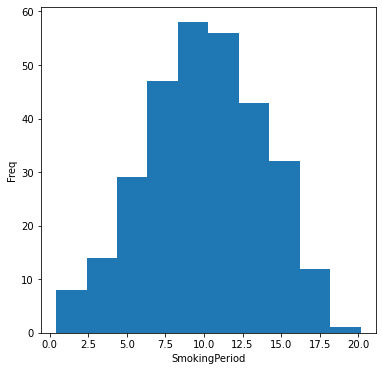

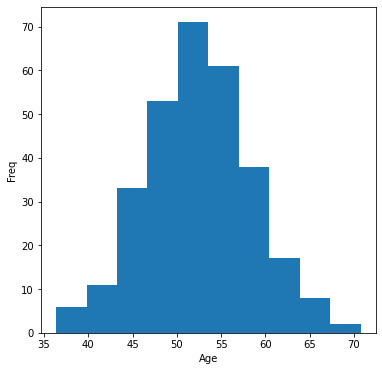

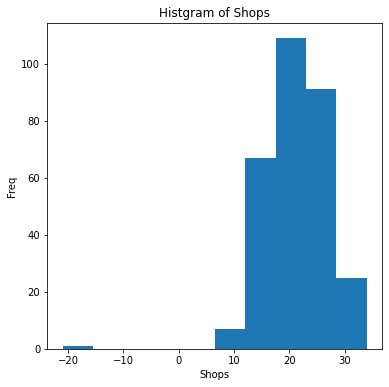

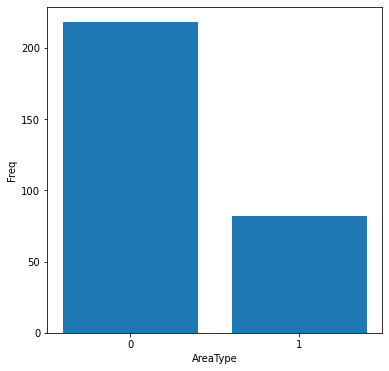

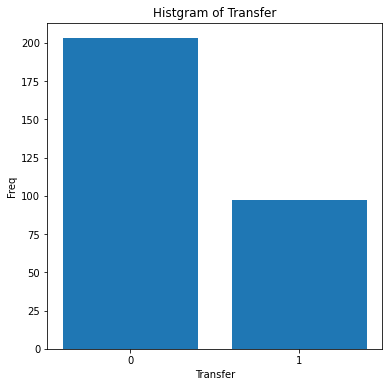

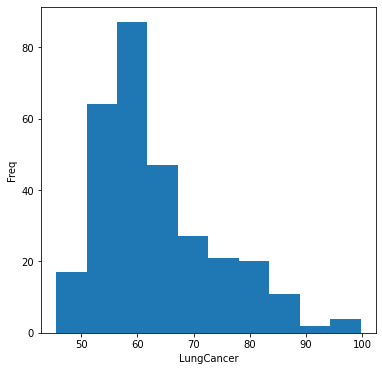

In [3]:
plt.figure(figsize=(6,6))
plt.hist(DF["Smoker"], bins=10)
plt.xlabel("Smoker")
plt.ylabel("Freq")

plt.figure(figsize=(6,6))
plt.hist(DF["SmokingPeriod"], bins=10)
plt.xlabel("SmokingPeriod")
plt.ylabel("Freq")

plt.figure(figsize=(6,6))
plt.hist(DF["Age"], bins=10)
plt.xlabel("Age")
plt.ylabel("Freq")

plt.figure(figsize=(6,6))
plt.hist(DF["Shops"], bins=10)
plt.title("Histgram of Shops")
plt.xlabel("Shops")
plt.ylabel("Freq")



plt.figure(figsize=(6,6))
labels = DF["AreaType"].value_counts().index # 変数の値
heights = DF["AreaType"].value_counts() # 頻度
plt.bar(labels, heights, tick_label=labels)
plt.xlabel("AreaType")
plt.ylabel("Freq")

plt.figure(figsize=(6,6))
labels = DF["Transfer"].value_counts().index
heights = DF["Transfer"].value_counts()
plt.title("Histgram of Transfer")
plt.bar(labels, heights, tick_label=labels)
plt.xlabel("Transfer")
plt.ylabel("Freq")

plt.figure(figsize=(6,6))
plt.hist(DF["LungCancer"], bins=10)
plt.xlabel("LungCancer")
plt.ylabel("Freq")

## 意思決定写像[ 3-9~3-18 ]

1変数データの数値的特徴把握

In [4]:
print(DF.describe())

       LungCancer      Smoker  SmokingPeriod         Age       Shops  \
count  300.000000  300.000000     300.000000  300.000000  300.000000   
mean    63.513167   14.850067      10.022733   52.429933   20.933333   
std     10.618330    2.699914       3.792545    5.899350    5.640473   
min     45.530000    8.200000       0.420000   36.380000  -21.000000   
25%     56.020000   13.072500       7.227500   48.320000   17.750000   
50%     60.890000   14.790000      10.060000   52.465000   21.000000   
75%     69.477500   16.740000      12.687500   56.000000   25.000000   
max     99.710000   23.730000      20.150000   70.740000   34.000000   

         AreaType    Transfer  
count  300.000000  300.000000  
mean     0.273333    0.323333  
std      0.446415    0.468530  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000  


## [ 3-1~3-18 ]考察

外れ値の除去

       LungCancer      Smoker  SmokingPeriod         Age       Shops  \
count  299.000000  299.000000     299.000000  299.000000  299.000000   
mean    63.465217   14.853946      10.015418   52.418997   21.073579   
std     10.603548    2.703602       3.796782    5.906192    5.099145   
min     45.530000    8.200000       0.420000   36.380000    7.000000   
25%     56.010000   13.065000       7.185000   48.300000   18.000000   
50%     60.780000   14.800000      10.040000   52.460000   21.000000   
75%     69.170000   16.750000      12.715000   56.020000   25.000000   
max     99.710000   23.730000      20.150000   70.740000   34.000000   

         AreaType    Transfer  
count  299.000000  299.000000  
mean     0.270903    0.324415  
std      0.445171    0.468941  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000  


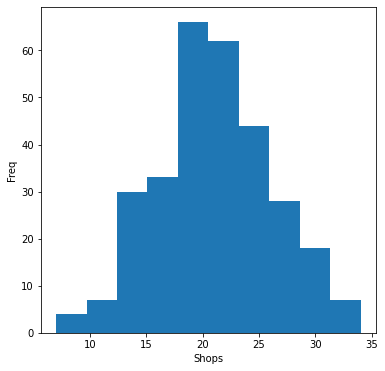

In [5]:
# データ読み込み
# 配布されているstore_sales.csvの297行目を削除することによって
# 外れ値を取り除き，適当なファイル名で保存せよ．
DF2 = pd.read_csv('data 2.csv')

# 外れ値除去結果の確認
plt.figure(figsize=(6,6))
plt.hist(DF2["Shops"], bins=10)
plt.xlabel("Shops")
plt.ylabel("Freq")

print(DF2.describe())

## 意思決定写像 [ 3-19~3-25 ]

2変数データの視覚的特徴把握

Text(0, 0.5, 'LungCancer')

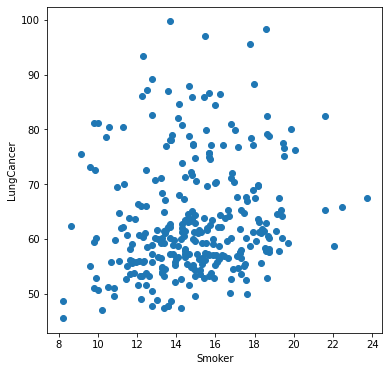

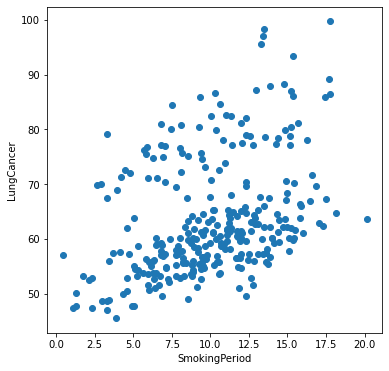

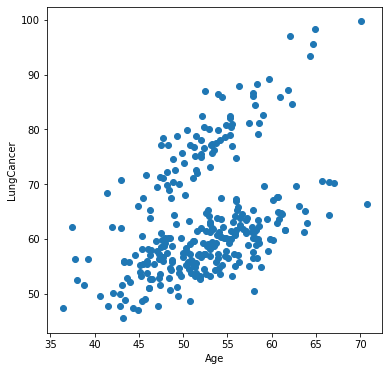

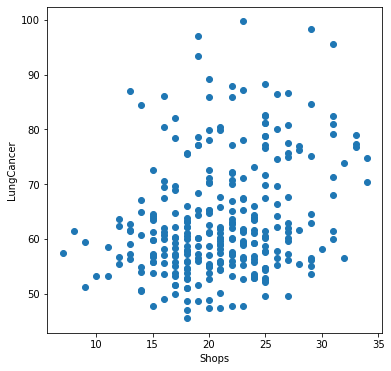

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(DF2["Smoker"], DF2["LungCancer"])
plt.xlabel("Smoker")
plt.ylabel("LungCancer")

plt.figure(figsize=(6,6))
plt.scatter(DF2["SmokingPeriod"], DF2["LungCancer"])
plt.xlabel("SmokingPeriod")
plt.ylabel("LungCancer")

plt.figure(figsize=(6,6))
plt.scatter(DF2["Age"], DF2["LungCancer"])
plt.xlabel("Age")
plt.ylabel("LungCancer")

plt.figure(figsize=(6,6))
plt.scatter(DF2["Shops"], DF2["LungCancer"])
plt.xlabel("Shops")
plt.ylabel("LungCancer")

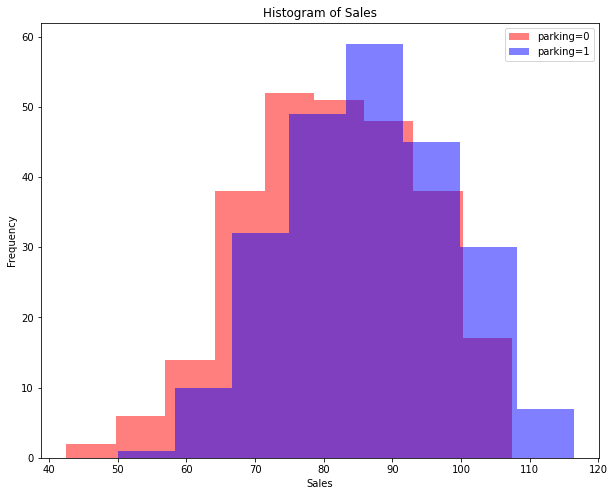

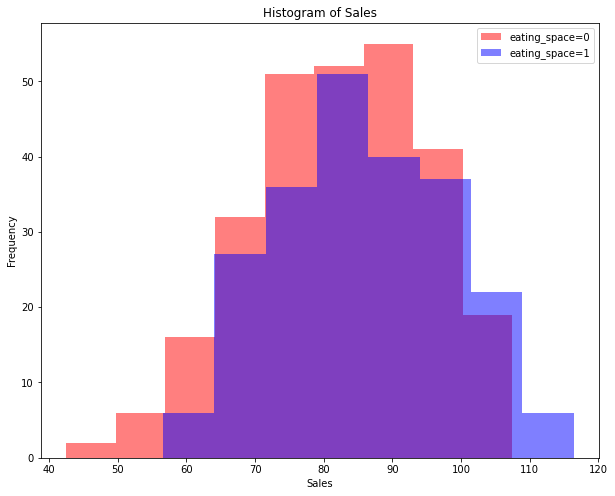

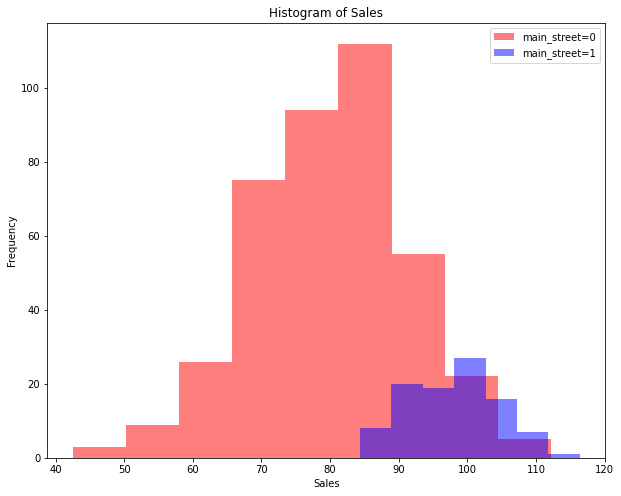

In [10]:
#層別したデータでヒストグラムを作成する

# parking
#階級幅の設定：スタージェスの公式
stur0 = int(np.ceil(np.log2(DF2[DF2["parking"]==0]["sales"].count())))
stur1 = int(np.ceil(np.log2(DF2[DF2["parking"]==1]["sales"].count())))

#ヒストグラムの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(DF2[DF2["parking"]==0]["sales"],
        bins=stur0,
        color='red',
        label='parking=0',
        alpha = 0.5)
ax.hist(DF2[DF2["parking"]==1]["sales"],
        bins=stur1,
        color='blue',
        label='parking=1',
        alpha = 0.5)
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sales')
ax.legend(loc='best')

plt.show()

# eating_space
#階級幅の設定：スタージェスの公式
stur0 = int(np.ceil(np.log2(DF2[DF2["eating_space"]==0]["sales"].count())))
stur1 = int(np.ceil(np.log2(DF2[DF2["eating_space"]==1]["sales"].count())))

#ヒストグラムの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(DF2[DF2["eating_space"]==0]["sales"],
        bins=stur0,
        color='red',
        label='eating_space=0',
        alpha = 0.5)
ax.hist(DF2[DF2["eating_space"]==1]["sales"],
        bins=stur1,
        color='blue',
        label='eating_space=1',
        alpha = 0.5)
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sales')
ax.legend(loc='best')

plt.show()

# main_street
#階級幅の設定：スタージェスの公式
stur0 = int(np.ceil(np.log2(DF2[DF2["main_street"]==0]["sales"].count())))
stur1 = int(np.ceil(np.log2(DF2[DF2["main_street"]==1]["sales"].count())))

#ヒストグラムの作成
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(DF2[DF2["main_street"]==0]["sales"],
        bins=stur0,
        color='red',
        label='main_street=0',
        alpha = 0.5)
ax.hist(DF2[DF2["main_street"]==1]["sales"],
        bins=stur1,
        color='blue',
        label='main_street=1',
        alpha = 0.5)
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Sales')
ax.legend(loc='best')

plt.show()

In [ ]:
# 以下を実行することで様々な散布図やヒストグラムを一度に描画することもできる．
# ただし，質的変数の視覚的特徴把握にも散布図が出力されてしまうなど，解釈に注意を要する場合がある．
# import seaborn as sns
# sns.pairplot(DF2)

## 意思決定写像 [ 3-26~3-29 ]

2変数データの数値的特徴把握

In [6]:
print(DF2.corr())
# 以下を用いてもよい
# print(DF2.corr())

               LungCancer    Smoker  SmokingPeriod       Age     Shops  \
LungCancer       1.000000  0.166719       0.393092  0.446047  0.271400   
Smoker           0.166719  1.000000      -0.050055  0.038417  0.346426   
SmokingPeriod    0.393092 -0.050055       1.000000  0.404292 -0.006423   
Age              0.446047  0.038417       0.404292  1.000000  0.091951   
Shops            0.271400  0.346426      -0.006423  0.091951  1.000000   
AreaType         0.804582  0.030587       0.040206 -0.000598  0.322326   
Transfer         0.099329 -0.046909       0.082221  0.073420 -0.010016   

               AreaType  Transfer  
LungCancer     0.804582  0.099329  
Smoker         0.030587 -0.046909  
SmokingPeriod  0.040206  0.082221  
Age           -0.000598  0.073420  
Shops          0.322326 -0.010016  
AreaType       1.000000  0.091985  
Transfer       0.091985  1.000000  


# 予測(ここまで１９)

## 意思決定写像 [ 4-1 ]

AICに基づくモデル選択

モデル1
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

モデル2
$$ y = \beta_0 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

モデル3
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

モデル4
$$ y = \beta_0 + \beta_2 x_2 + \beta_3 x_3 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \varepsilon$$

※今回は，モデル選択の考え方を身に着けることを目的としたレポートであるため，定性的な考察に基づき上記の4モデルのみのAICを確認しているが，これら以外のモデルのAICを確認しても構わない．もし適切なツールを用いて網羅的に全てのモデルのAICを確認する方法があるならばそのようにすべきである．

# 設定の見直し（設定の検証）

## 分析の再実行

モデル1から4のうち，AICが最も低かったモデルに基づく分析を再実行せよ．これによりresult変数に保存された分析結果がAIC最小のモデルに基づくものに更新される．

In [68]:
#回帰分析

# モデル作成
MODELA = "LungCancer ~AreaType + Age + SmokingPeriod + Smoker + Shops"

# 回帰分析の実行分析
result = smf.ols(MODELA, DF2).fit()

# 結果の出力
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LungCancer   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     594.9
Date:                Sat, 21 May 2022   Prob (F-statistic):          4.28e-151
Time:                        03:26:02   Log-Likelihood:                -769.22
No. Observations:                 299   AIC:                             1550.
Df Residuals:                     293   BIC:                             1573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1386      1.941      6.253      0.000       8.318      15.959
AreaType         19.4573      0.443     43.922      0.000      18.585      20.329
Age               0.6412      0.035     18.538      0.000       0.573       0.709
SmokingPeriod     0.6248      0.054     11.643      0.000       0.519       0.730
Smoker            0.6564      0.074      8.925      0.000       0.512       0.801
Shops            -0.1690      0.041     -4.091      0.000      -0.250      -0.088
==============================================================================
Omnibus:                        8.312   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               13.702
Skew:                          -0.103   Prob(JB):                      0.00106
Kurtosis:                       4.028   Cond. No.                         625.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 意思決定写像 [ 5-1~5-3 ]

Text(0, 0.5, 'Residual')

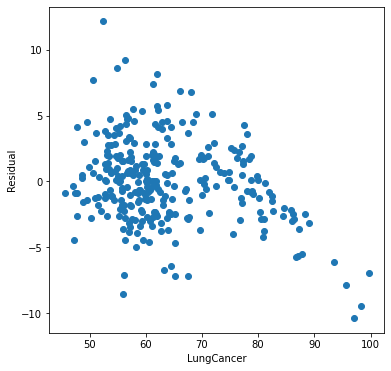

In [24]:
# 残差プロット
plt.figure(figsize=(6,6))
plt.scatter(DF2["LungCancer"], result.fittedvalues-DF2["LungCancer"])
plt.xlabel("LungCancer")
plt.ylabel("Residual")

((array([-2.83163513, -2.53513316, -2.36724083, -2.24759425, -2.1534557 ,
         -2.07524656, -2.00798865, -1.94874985, -1.89565172, -1.84741566,
         -1.80313046, -1.76212289, -1.72388091, -1.68800561, -1.65417993,
         -1.62214751, -1.59169801, -1.56265662, -1.53487641, -1.50823263,
         -1.48261848, -1.4579417 , -1.4341221 , -1.41108949, -1.38878205,
         -1.36714505, -1.34612982, -1.32569284, -1.30579504, -1.28640121,
         -1.26747952, -1.24900105, -1.23093949, -1.21327079, -1.19597295,
         -1.17902575, -1.16241058, -1.14611025, -1.13010889, -1.11439177,
         -1.09894522, -1.08375652, -1.06881381, -1.05410601, -1.03962278,
         -1.0253544 , -1.01129177, -0.99742634, -0.98375006, -0.97025535,
         -0.95693505, -0.94378242, -0.93079107, -0.91795493, -0.9052683 ,
         -0.89272572, -0.88032203, -0.86805232, -0.85591192, -0.84389639,
         -0.83200147, -0.82022312, -0.80855748, -0.79700085, -0.7855497 ,
         -0.77420064, -0.76295043, -0.

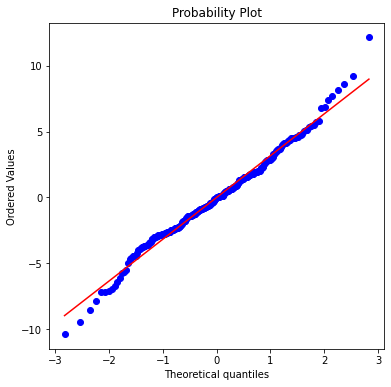

In [25]:
# Q-Qプロット
plt.figure(figsize=(6,6))
stats.probplot(result.fittedvalues-DF2["LungCancer"],dist="norm",plot=plt)

In [69]:
# 正規性の検定
stats.shapiro(result.fittedvalues-DF2["LungCancer"])

ShapiroResult(statistic=0.9884066581726074, pvalue=0.017207862809300423)

# 設定の見直し（予測式の見直し）

## 意思決定写像 [ 6-1~6-3 ]

層別残差プロット1

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：駐車場$x_5$（質的変数）

Text(0, 0.5, 'Residual')

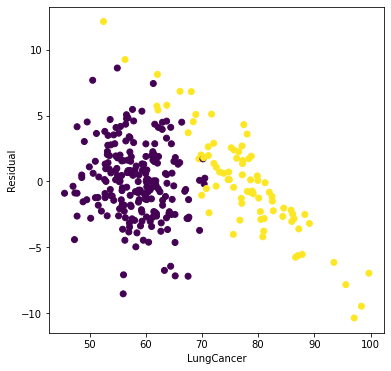

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(DF2["LungCancer"], result.fittedvalues-DF2["LungCancer"], c=DF2["AreaType"])
plt.xlabel("LungCancer")
plt.ylabel("Residual")

層別残差プロット2

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：イートインスペースの有無$x_6$（質的変数）

Text(0, 0.5, 'Residual')

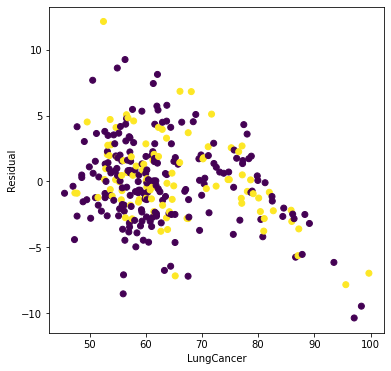

In [27]:
plt.figure(figsize=(6,6))
# 上記の層別残差プロット2を以下に描画せよ
plt.scatter(DF2["LungCancer"], result.fittedvalues-DF2["LungCancer"], c=DF2["Transfer"])
plt.xlabel("LungCancer")
plt.ylabel("Residual")


## [ 6-1~6-3 ] 考察

層別散布図

縦軸：駅からの距離$x_2$，横軸：$y_i$，層別：大通りに面しているか否か$x_7$（質的変数）

Text(0, 0.5, 'LungCancer')

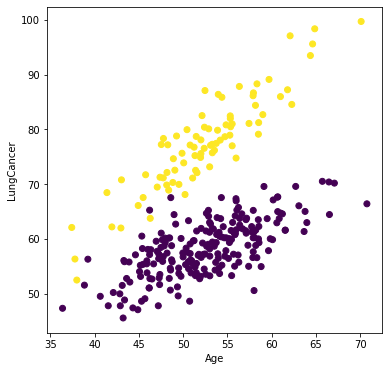

In [31]:
#層別散布図
plt.figure(figsize=(6,6))
plt.scatter(DF2["Age"], DF2["LungCancer"] , c=DF2["AreaType"])
plt.xlabel("Age")
plt.ylabel("LungCancer")

## 意思決定写像 [ 6-4~6-7 ]

層別残差プロット

縦軸：残差$y_i - \hat{y}_i$，横軸：$y_i$，層別：大通りに面しているか否か$x_7$（質的変数）

In [9]:
#交互作用項を含めたモデル作成
MODEL = "LungCancer ~ Smoker + SmokingPeriod + Age + AreaType + Shops + Age*AreaType"

#回帰分析の実行分析
result = smf.ols(MODEL, DF2).fit()

#結果の出力
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LungCancer   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     854.5
Date:                Sat, 21 May 2022   Prob (F-statistic):          6.02e-182
Time:                        19:37:53   Log-Likelihood:                -693.07
No. Observations:                 299   AIC:                             1400.
Df Residuals:                     292   BIC:                             1426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.1705      1.703     13.608      0.000      19.819      26.522
Smoker            0.7000      0.057     12.239      0.000       0.587       0.813
SmokingPeriod     0.6433      0.042     15.430      0.000       0.561       0.725
Age               0.4159      0.031     13.267      0.000       0.354       0.478
AreaType        -19.6791      2.831     -6.951      0.000     -25.251     -14.107
Shops            -0.1717      0.032     -5.351      0.000      -0.235      -0.109
Age:AreaType      0.7466      0.054     13.926      0.000       0.641       0.852
==============================================================================
Omnibus:                        0.745   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.601
Skew:                           0.106   Prob(JB):                        0.741
Kurtosis:                       3.056   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#交互作用項を含めたモデル作成
MODEL = "LungCancer ~ Smoker + SmokingPeriod + Age + AreaType + Shops + Smoker*Age*AreaType"

#回帰分析の実行分析
result = smf.ols(MODEL, DF2).fit()

#結果の出力
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LungCancer   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     580.7
Date:                Sat, 21 May 2022   Prob (F-statistic):          2.40e-179
Time:                        19:21:45   Log-Likelihood:                -688.91
No. Observations:                 299   AIC:                             1398.
Df Residuals:                     289   BIC:                             1435.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.2387      9.435      1.403      0.162      -5.331      31.808
Smoker                  1.3820      0.636      2.175      0.030       0.131       2.633
SmokingPeriod           0.6385      0.042     15.371      0.000       0.557       0.720
Age                     0.5919      0.181      3.268      0.001       0.235       0.948
AreaType               24.8818     18.064      1.377      0.169     -10.672      60.435
Shops                  -0.1679      0.032     -5.247      0.000      -0.231      -0.105
Smoker:Age             -0.0121      0.012     -0.993      0.321      -0.036       0.012
Smoker:AreaType        -2.9983      1.204     -2.491      0.013      -5.368      -0.629
Age:AreaType           -0.0486      0.343     -0.142      0.887      -0.723       0.626
Smoker:Age:AreaType     0.0535      0.023      2.344      0.020       0.009       0.098
==============================================================================
Omnibus:                        0.544   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.369
Skew:                           0.074   Prob(JB):                        0.831
Kurtosis:                       3.088   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

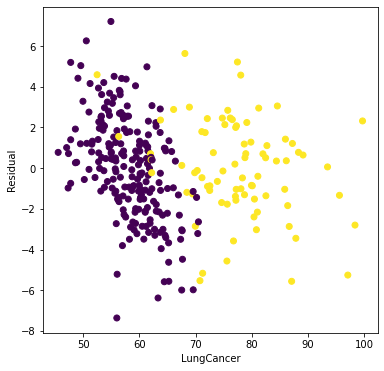

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(DF2["LungCancer"], result.fittedvalues-DF2["LungCancer"], c=DF2["AreaType"])
plt.xlabel("LungCancer")
plt.ylabel("Residual")

((array([-2.83163513, -2.53513316, -2.36724083, -2.24759425, -2.1534557 ,
         -2.07524656, -2.00798865, -1.94874985, -1.89565172, -1.84741566,
         -1.80313046, -1.76212289, -1.72388091, -1.68800561, -1.65417993,
         -1.62214751, -1.59169801, -1.56265662, -1.53487641, -1.50823263,
         -1.48261848, -1.4579417 , -1.4341221 , -1.41108949, -1.38878205,
         -1.36714505, -1.34612982, -1.32569284, -1.30579504, -1.28640121,
         -1.26747952, -1.24900105, -1.23093949, -1.21327079, -1.19597295,
         -1.17902575, -1.16241058, -1.14611025, -1.13010889, -1.11439177,
         -1.09894522, -1.08375652, -1.06881381, -1.05410601, -1.03962278,
         -1.0253544 , -1.01129177, -0.99742634, -0.98375006, -0.97025535,
         -0.95693505, -0.94378242, -0.93079107, -0.91795493, -0.9052683 ,
         -0.89272572, -0.88032203, -0.86805232, -0.85591192, -0.84389639,
         -0.83200147, -0.82022312, -0.80855748, -0.79700085, -0.7855497 ,
         -0.77420064, -0.76295043, -0.

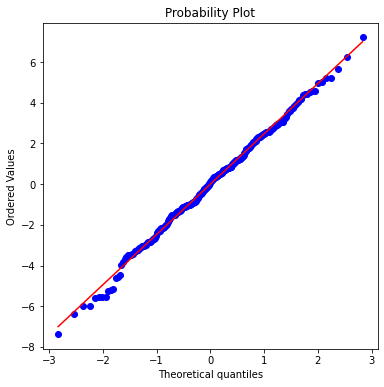

In [15]:
# Q-Qプロット
plt.figure(figsize=(6,6))
stats.probplot(result.fittedvalues-DF2["LungCancer"],dist="norm",plot=plt)

In [8]:
# 正規性の検定
stats.shapiro(result.fittedvalues-DF2["LungCancer"])

ShapiroResult(statistic=0.9965911507606506, pvalue=0.775667130947113)